# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [46]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [48]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [51]:
# Check the shape of the data
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [53]:
spaceship.value_counts()

PassengerId  HomePlanet  CryoSleep  Cabin     Destination    Age   VIP    RoomService  FoodCourt  ShoppingMall  Spa    VRDeck  Name               Transported
0001_01      Europa      False      B/0/P     TRAPPIST-1e    39.0  False  0.0          0.0        0.0           0.0    0.0     Maham Ofracculy    False          1
6162_01      Earth       False      F/1181/S  55 Cancri e    22.0  False  0.0          0.0        1.0           575.0  0.0     Bonyan Hineyley    False          1
6175_01      Earth       False      G/1000/P  TRAPPIST-1e    18.0  False  628.0        0.0        0.0           31.0   150.0   Thel Pittler       False          1
6174_02      Earth       True       G/999/P   PSO J318.5-22  4.0   False  0.0          0.0        0.0           0.0    0.0     Cherry Fisheparks  True           1
6174_01      Earth       False      F/1274/P  55 Cancri e    24.0  False  0.0          479.0      116.0         1.0    37.0    Jord Mcbriddley    False          1
                           

**Check for data types**

In [56]:
# Check for data types
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [59]:
# Check for missing values
spaceship.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [61]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [64]:
# drop null values
spaceship.dropna(axis=0, how='any', inplace=True)
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [67]:
# transform the "Cabin" column
spaceship['Cabin'] = spaceship['Cabin'].str.split('/').str[0]
spaceship.value_counts()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination    Age   VIP    RoomService  FoodCourt  ShoppingMall  Spa    VRDeck  Name               Transported
0001_01      Europa      False      B      TRAPPIST-1e    39.0  False  0.0          0.0        0.0           0.0    0.0     Maham Ofracculy    False          1
6162_01      Earth       False      F      55 Cancri e    22.0  False  0.0          0.0        1.0           575.0  0.0     Bonyan Hineyley    False          1
6175_01      Earth       False      G      TRAPPIST-1e    18.0  False  628.0        0.0        0.0           31.0   150.0   Thel Pittler       False          1
6174_02      Earth       True       G      PSO J318.5-22  4.0   False  0.0          0.0        0.0           0.0    0.0     Cherry Fisheparks  True           1
6174_01      Earth       False      F      55 Cancri e    24.0  False  0.0          479.0      116.0         1.0    37.0    Jord Mcbriddley    False          1
                                             

- Drop PassengerId and Name

In [79]:
# drop the columns "PassengerId" and "Name"
spaceship.drop(columns=["PassengerId", "Name"], inplace=True)
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   object 
 1   CryoSleep     6606 non-null   object 
 2   Cabin         6606 non-null   object 
 3   Destination   6606 non-null   object 
 4   Age           6606 non-null   float64
 5   VIP           6606 non-null   object 
 6   RoomService   6606 non-null   float64
 7   FoodCourt     6606 non-null   float64
 8   ShoppingMall  6606 non-null   float64
 9   Spa           6606 non-null   float64
 10  VRDeck        6606 non-null   float64
 11  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 625.8+ KB


- For non-numerical columns, do dummies.

In [91]:
# Check value counts of all columns containing string values
spaceship["HomePlanet"].value_counts()

HomePlanet
Earth     3566
Europa    1673
Mars      1367
Name: count, dtype: int64

In [85]:
spaceship["CryoSleep"].value_counts()

CryoSleep
False    4274
True     2332
Name: count, dtype: int64

In [87]:
spaceship["Cabin"].value_counts()

Cabin
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64

In [89]:
spaceship["Destination"].value_counts()

Destination
TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: count, dtype: int64

In [93]:
spaceship["VIP"].value_counts()

VIP
False    6444
True      162
Name: count, dtype: int64

In [97]:
# Create dummies for all non-numerical columns
spaceship_dummies = pd.get_dummies(spaceship)   # Its possible to include "drop_first=True"
spaceship_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6606 non-null   float64
 1   RoomService                6606 non-null   float64
 2   FoodCourt                  6606 non-null   float64
 3   ShoppingMall               6606 non-null   float64
 4   Spa                        6606 non-null   float64
 5   VRDeck                     6606 non-null   float64
 6   Transported                6606 non-null   bool   
 7   HomePlanet_Earth           6606 non-null   bool   
 8   HomePlanet_Europa          6606 non-null   bool   
 9   HomePlanet_Mars            6606 non-null   bool   
 10  CryoSleep_False            6606 non-null   bool   
 11  CryoSleep_True             6606 non-null   bool   
 12  Cabin_A                    6606 non-null   bool   
 13  Cabin_B                    6606 non-null   bool   
 1

**Perform Train Test Split**

In [101]:
# define "Transported" as target
spaceship_target = spaceship_dummies["Transported"]
spaceship_target.info()

<class 'pandas.core.series.Series'>
Index: 6606 entries, 0 to 8692
Series name: Transported
Non-Null Count  Dtype
--------------  -----
6606 non-null   bool 
dtypes: bool(1)
memory usage: 58.1 KB


In [103]:
# select feature columns
spaceship_numeric = spaceship_dummies.drop(columns=["Transported"])
spaceship_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6606 non-null   float64
 1   RoomService                6606 non-null   float64
 2   FoodCourt                  6606 non-null   float64
 3   ShoppingMall               6606 non-null   float64
 4   Spa                        6606 non-null   float64
 5   VRDeck                     6606 non-null   float64
 6   HomePlanet_Earth           6606 non-null   bool   
 7   HomePlanet_Europa          6606 non-null   bool   
 8   HomePlanet_Mars            6606 non-null   bool   
 9   CryoSleep_False            6606 non-null   bool   
 10  CryoSleep_True             6606 non-null   bool   
 11  Cabin_A                    6606 non-null   bool   
 12  Cabin_B                    6606 non-null   bool   
 13  Cabin_C                    6606 non-null   bool   
 1

In [105]:
# Train Test Split
# split X (features) and y (target) into X_train, X_test, y_train, and y_test. 
# 80% of the data should be in the training set and 20% in the test set.

X_train, X_test, y_train, y_test = train_test_split(spaceship_numeric, spaceship_target, test_size=0.20, random_state=0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5284 entries, 3432 to 3642
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        5284 non-null   float64
 1   RoomService                5284 non-null   float64
 2   FoodCourt                  5284 non-null   float64
 3   ShoppingMall               5284 non-null   float64
 4   Spa                        5284 non-null   float64
 5   VRDeck                     5284 non-null   float64
 6   HomePlanet_Earth           5284 non-null   bool   
 7   HomePlanet_Europa          5284 non-null   bool   
 8   HomePlanet_Mars            5284 non-null   bool   
 9   CryoSleep_False            5284 non-null   bool   
 10  CryoSleep_True             5284 non-null   bool   
 11  Cabin_A                    5284 non-null   bool   
 12  Cabin_B                    5284 non-null   bool   
 13  Cabin_C                    5284 non-null   bool   

In [107]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1322 entries, 2453 to 6640
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1322 non-null   float64
 1   RoomService                1322 non-null   float64
 2   FoodCourt                  1322 non-null   float64
 3   ShoppingMall               1322 non-null   float64
 4   Spa                        1322 non-null   float64
 5   VRDeck                     1322 non-null   float64
 6   HomePlanet_Earth           1322 non-null   bool   
 7   HomePlanet_Europa          1322 non-null   bool   
 8   HomePlanet_Mars            1322 non-null   bool   
 9   CryoSleep_False            1322 non-null   bool   
 10  CryoSleep_True             1322 non-null   bool   
 11  Cabin_A                    1322 non-null   bool   
 12  Cabin_B                    1322 non-null   bool   
 13  Cabin_C                    1322 non-null   bool   

In [109]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 5284 entries, 3432 to 3642
Series name: Transported
Non-Null Count  Dtype
--------------  -----
5284 non-null   bool 
dtypes: bool(1)
memory usage: 46.4 KB


In [111]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 1322 entries, 2453 to 6640
Series name: Transported
Non-Null Count  Dtype
--------------  -----
1322 non-null   bool 
dtypes: bool(1)
memory usage: 11.6 KB


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [117]:
# Normalization
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

normalizer = MinMaxScaler()

In [119]:
# fitting = calculating min and max for each column
normalizer.fit(X_train)

MinMaxScaler()

In [121]:
# transforming = using the min and max data to scale the rest of the values
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [123]:
# The normalizer returns an array instead of a dataframe
X_train_norm

array([[4.05063291e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.06329114e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.79746835e-01, 0.00000000e+00, 7.91600979e-03, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.55696203e-01, 0.00000000e+00, 1.59527723e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.30379747e-01, 0.00000000e+00, 1.34169658e-04, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.77215190e-01, 2.01612903e-04, 2.95508671e-02, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [125]:
# creating a dataframe of the X_train array again
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.405063,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.050633,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.379747,0.00000,0.007916,0.000000,0.051276,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.215190,0.00131,0.000000,0.046111,0.016378,0.000049,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.329114,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [127]:
# same for the X_test array
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.632911,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.227848,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.189873,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.658228,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.784810,0.0,0.054775,0.0,0.07774,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [149]:
# KNN Classification - modeling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)   # default is n_neighbors=5
knn

KNeighborsClassifier(n_neighbors=10)

In [151]:
# Training KNN to the normalized data
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=10)

- Evaluate your model's performance. Comment it

In [153]:
# Evaluate the knn model: make a prediction for X_test_norm
pred = knn.predict(X_test_norm)
pred = (pred >= 0.5).astype(bool)  # Convert to 0 or 1 (threshold at 0.5)
pred

array([ True,  True,  True, ...,  True,  True,  True])

In [155]:
# Check for the real y_test values of the dataset
y_test.values

array([ True, False,  True, ...,  True,  True,  True])

In [157]:
# Evaluate model's performance --> calculate accuracy
knn.score(X_test_norm, y_test)

0.7594553706505295

In [159]:
# The accuracy is 76%

In [164]:
# Logistic Regression ML model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [168]:
# create an instance of Logistic Regression model.
log_reg = LogisticRegression()

In [170]:
# Creating the function with the best logarithmic fit to the training data
log_reg.fit(X_train, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [177]:
# Evaluate model's performance: Predicting the fit for the test data
pred_log = log_reg.predict_proba(X_test)

In [179]:
pred_log

array([[0.08009129, 0.91990871],
       [0.29682832, 0.70317168],
       [0.18385095, 0.81614905],
       ...,
       [0.01173863, 0.98826137],
       [0.2907861 , 0.7092139 ],
       [0.07080546, 0.92919454]])

In [197]:
# Convert probabilities to class labels
pred_log_bool = np.argmax(pred_log, axis=1)
pred_log_bool

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [199]:
# Convert predictions to boolean values
pred_log_bool = pred_log_bool.astype(bool)
pred_log_bool

array([ True,  True,  True, ...,  True,  True,  True])

In [203]:
# Determine the accuracy of the logistic regression classification model:
from sklearn.metrics import accuracy_score

accuracy_log = accuracy_score(y_test, pred_log_bool)

print(f"Accuracy: {accuracy_log:.4f}")

Accuracy: 0.7746


In [205]:
# Decision Tree ML model
from sklearn.tree import DecisionTreeRegressor

In [207]:
# Initialize a Decision Tree instance
# Define the complexity of the tree
tree = DecisionTreeRegressor(max_depth=5)

In [209]:
# Training the decision tree model: fitting
# Scaling of training data is not necessary --> use X_train not the normalized version
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [219]:
# Evaluate model's performance: Predicting the fit for the test data
pred_tree = tree.predict(X_test)
pred_tree

array([1.        , 0.74760383, 0.74760383, ..., 0.98130841, 0.74760383,
       0.98928571])

In [223]:
# Convert probabilities to class labels --> boolean values
pred_tree_bool = (pred >= 0.5).astype(bool)  # Convert to 0 or 1 (threshold at 0.5)
pred_tree_bool

array([ True,  True,  True, ...,  True,  True,  True])

In [225]:
# Determine the accuracy of the decision tree classification model:

accuracy_tree = accuracy_score(y_test, pred_tree_bool)

print(f"Accuracy: {accuracy_tree:.4f}")

Accuracy: 0.7595


In [227]:
# Check what are the most relevant features for the decision tree model:
tree_importance = {feature : importance for feature, importance in zip(X_train.columns, tree.feature_importances_)}
tree_importance

{'Age': 0.014154740517093865,
 'RoomService': 0.09322681439239197,
 'FoodCourt': 0.08446715259487157,
 'ShoppingMall': 0.010630669734733951,
 'Spa': 0.08875194430741383,
 'VRDeck': 0.12493663733444532,
 'HomePlanet_Earth': 0.06715474178462456,
 'HomePlanet_Europa': 0.011943097722371928,
 'HomePlanet_Mars': 0.0,
 'CryoSleep_False': 0.0,
 'CryoSleep_True': 0.47296898929281705,
 'Cabin_A': 0.0,
 'Cabin_B': 0.0,
 'Cabin_C': 0.0,
 'Cabin_D': 0.0,
 'Cabin_E': 0.01975390909787353,
 'Cabin_F': 0.004494184254638382,
 'Cabin_G': 0.0,
 'Cabin_T': 0.0,
 'Destination_55 Cancri e': 0.0,
 'Destination_PSO J318.5-22': 0.0,
 'Destination_TRAPPIST-1e': 0.007517118966723936,
 'VIP_False': 0.0,
 'VIP_True': 0.0}

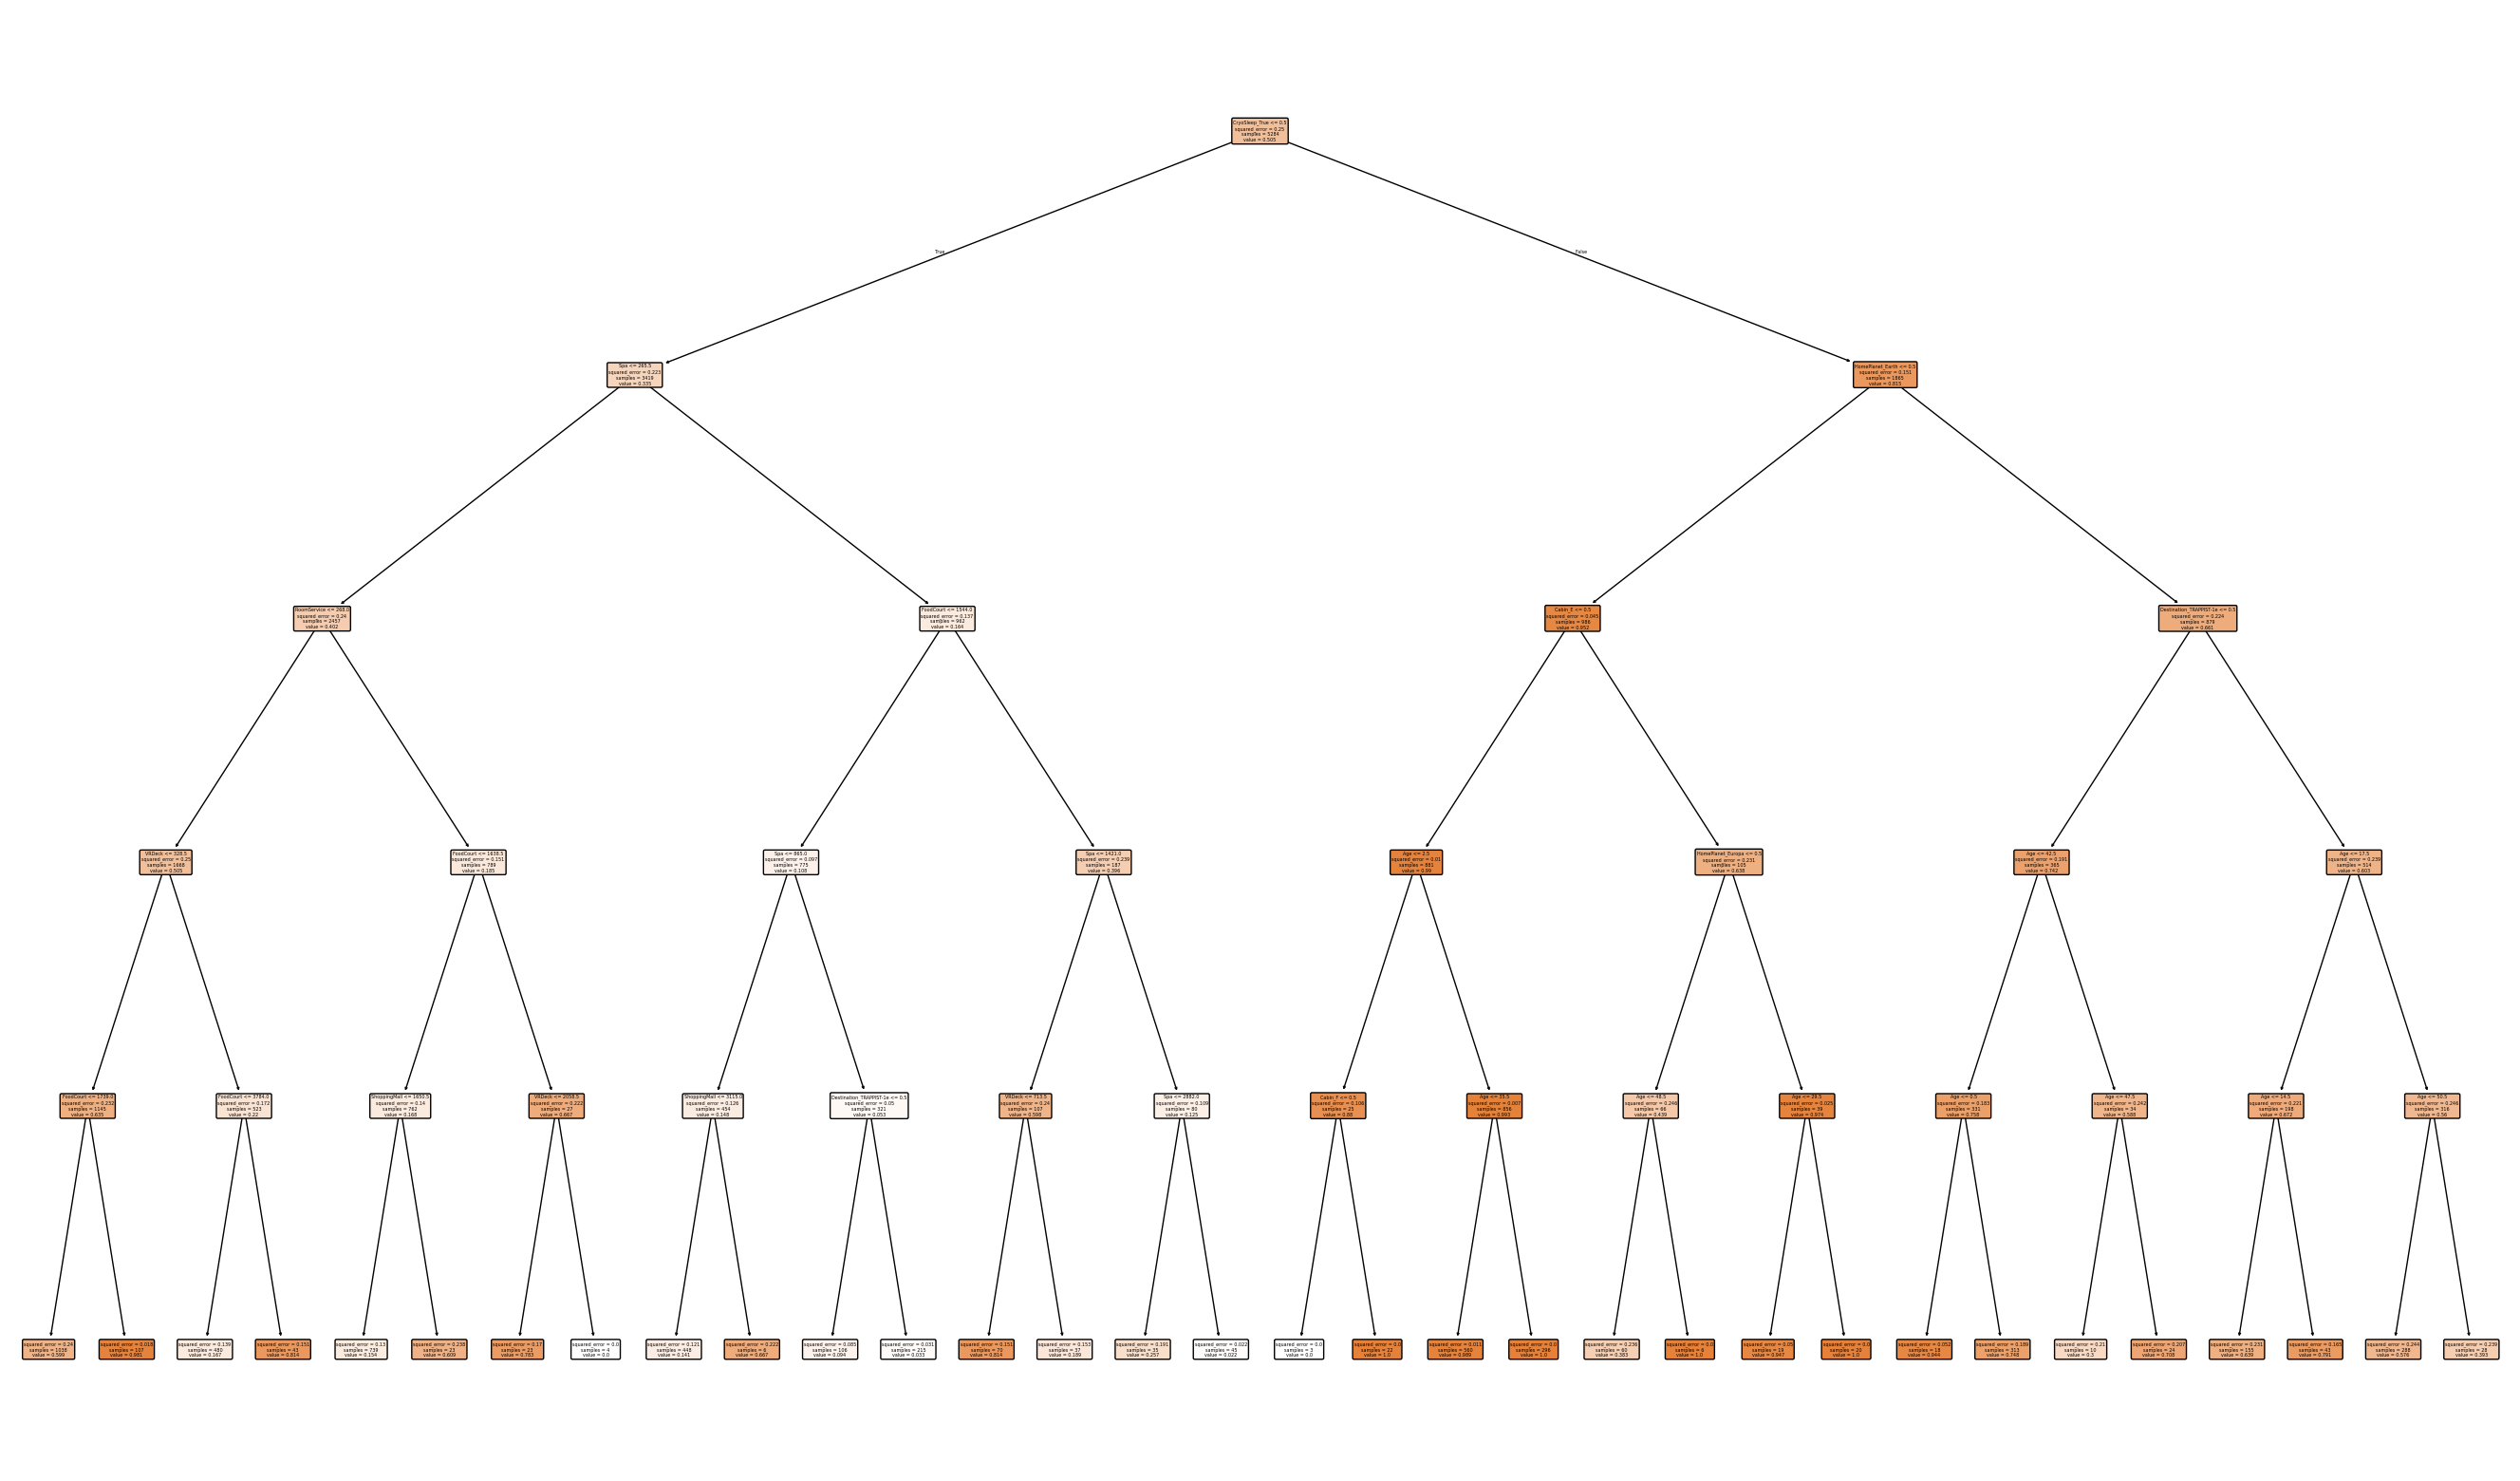

In [229]:
# Visualization of the decision tree nodes:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (34,20))
plot_tree(tree, filled = True, rounded=True, feature_names=list(X_train.columns))
plt.show()